In [1]:
import pandas as pd
from utils import load_data

# EDA for GOOG Historical Data

In [2]:
# Load the data
df = load_data('GOOG_historical_data.csv', base_dir='../data/yfinance_data')

# Summary statistics for all numeric columns
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()

# List columns with >5% nulls
threshold = 0.05 * len(df)
columns_with_many_nulls = missing_values[missing_values > threshold].index.tolist()

print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Report:\n", missing_values)
print("\nColumns with >5% nulls:\n", columns_with_many_nulls)

Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  5020.000000  5020.000000  5020.000000  5020.000000  5020.000000   
mean     45.251315    45.728793    44.800587    45.274515    45.224493   
std      43.338635    43.818298    42.918167    43.377299    43.332534   
min       2.470490     2.534002     2.390042     2.490913     2.488082   
25%      13.034705    13.145415    12.881592    13.032090    13.017277   
50%      26.982210    27.194902    26.791387    27.005927    26.975230   
75%      60.215126    60.758375    59.811811    60.280252    60.211734   
max     191.750000   193.309998   190.619995   192.660004   192.660004   

             Volume    Dividends  Stock Splits  
count  5.020000e+03  5020.000000   5020.000000  
mean   1.157539e+08     0.000040      0.004583  
std    1.497936e+08     0.002823      0.284034  
min    1.584340e+05     0.000000      0.000000  
25%    2.733950e+07     0.000000      0.000000  
50%    5.585480e+0

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on GOOG historical data.

In [3]:
import talib
# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows to show the new indicator columns
df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()

,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
5015,174.369995,185.500001,180.3948,37.434718,-0.034166,1.571016,-1.605182
5016,169.160004,184.689501,180.3600,32.279082,-1.106693,1.035474,-2.142167
5017,168.679993,183.780501,180.2950,31.843937,-1.972672,0.433845,-2.406517
5018,171.130005,183.166001,180.2400,36.545844,-2.433223,-0.139569,-2.293654
5019,171.860001,182.534501,180.1686,37.920068,-2.708091,-0.653273,-2.054818


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on GOOG price trends.

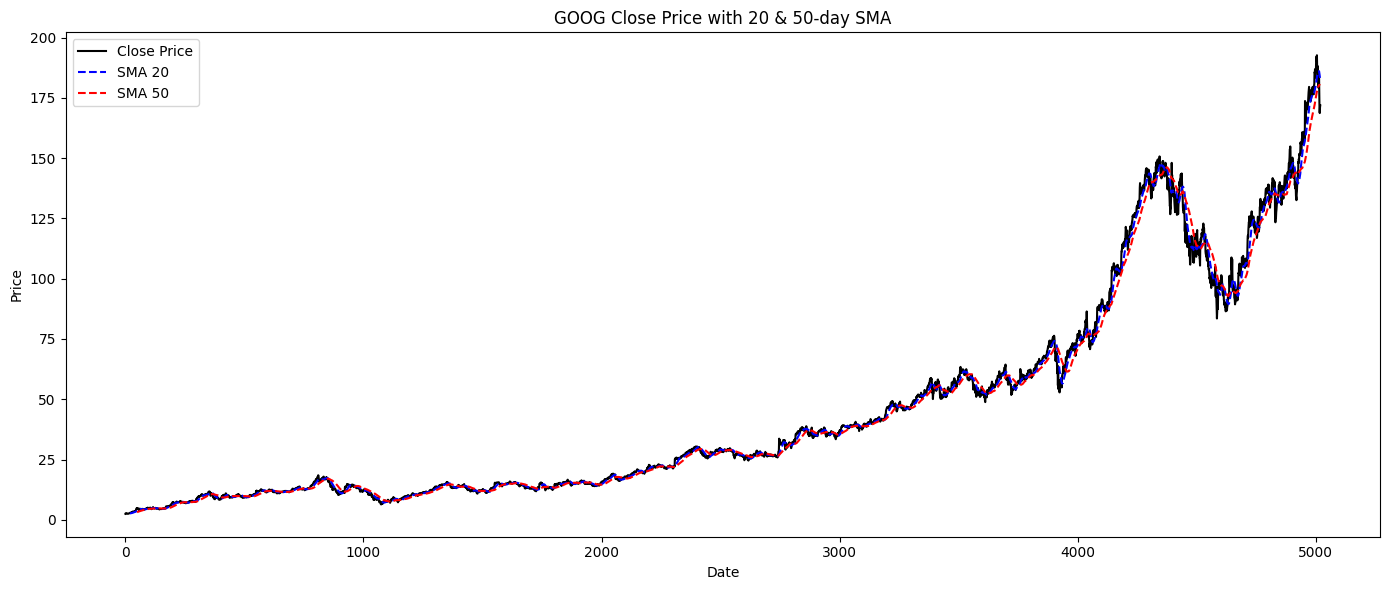

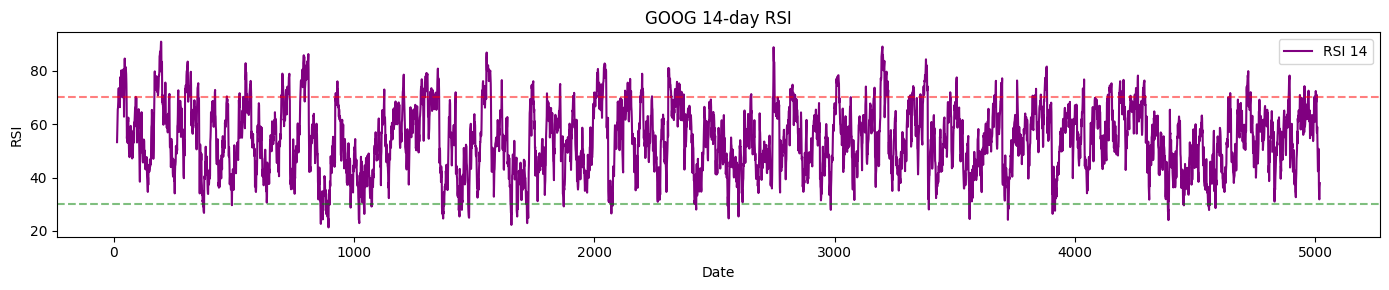

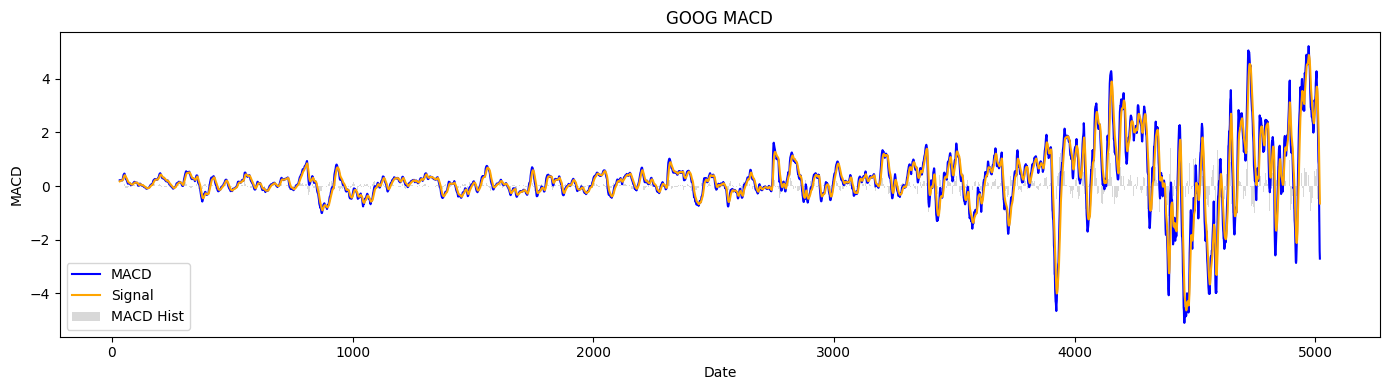

In [4]:
import matplotlib.pyplot as plt

# Plot Close price with SMA overlays
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='--')
plt.title('GOOG Close Price with 20 & 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('GOOG 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('GOOG MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()